In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

# For surfvel data in tif files
import rasterio
from rasterio.transform import from_origin

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
xModel10 = np.arange(-72.,97.,1.0)*10
yModel10 = np.arange(-345.,-56.,1.0)*10
xModel16 = np.arange(-72.,97.,1.6)*10
yModel16 = np.arange(-345.,-56.,1.6)*10
xModel40 = np.arange(-72.,97.,4.0)*10
yModel40 = np.arange(-345.,-56.,4.0)*10

ds_bm5_orig = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms_orig.nc")

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['grid_mapping'] = 'mapping'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['standard_name'] = 'land_ice_thickness_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['long_name'] = 'Ice thickness uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs']*0.0 + 5.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['standard_name'] = 'land_ice_surface_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['long_name'] = 'Ice surface uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].copy()
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['standard_name'] = 'land_ice_bed_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['long_name'] = 'Ice bed uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_age_data_40kms.nc', mode='w')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_bm5_data_40kms.nc', mode='w')

In [3]:
def frac_area(x, y, xx, yy):
    """
    Compute the fraction of the area of the small rectangle (xx, yy)
    within the large rectangle (x, y).

    Parameters:
        x, y:   Length-2 arrays for the large rectangle [x1, x2], [y1, y2]
        xx, yy: Length-2 arrays for the small rectangle

    Returns:
        Fraction of area of (xx, yy) within (x, y)
    """

    x = sorted(x)
    y = sorted(y)
    xx = sorted(xx)
    yy = sorted(yy)

    dx_inv = 1.0 / (x[1] - x[0])
    dy_inv = 1.0 / (y[1] - y[0])

    # Normalize coordinates of small rectangle to large rectangle frame
    xxm = (np.array(xx) - x[0]) * dx_inv
    yym = (np.array(yy) - y[0]) * dy_inv

    # Error check: small rectangle should not be larger than the big one
    if (xx[1] - xx[0] > x[1] - x[0]) or (yy[1] - yy[0] > y[1] - y[0]):
        raise ValueError("Small rectangle larger than large rectangle!")

    # Fully inside
    if 0 <= xxm[0] and xxm[1] <= 1 and 0 <= yym[0] and yym[1] <= 1:
        return 1.0

    # Edge overlap cases
    if 0 <= xxm[0] and xxm[1] <= 1:
        if yym[0] < 0 < yym[1]:
            return yym[1] / (yym[1] - yym[0])
        elif yym[0] < 1 < yym[1]:
            return (1 - yym[0]) / (yym[1] - yym[0])
        else:
            return 0.0

    if 0 <= yym[0] and yym[1] <= 1:
        if xxm[0] < 0 < xxm[1]:
            return xxm[1] / (xxm[1] - xxm[0])
        elif xxm[0] < 1 < xxm[1]:
            return (1 - xxm[0]) / (xxm[1] - xxm[0])
        else:
            return 0.0

    # Corner overlap cases
    denom = (xxm[1] - xxm[0]) * (yym[1] - yym[0])
    if denom == 0:
        return 0.0

    if xxm[0] < 0 < xxm[1] and yym[0] < 0 < yym[1]:
        return xxm[1] * yym[1] / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 0 < yym[1]:
        return (1 - xxm[0]) * yym[1] / denom
    if xxm[0] < 0 < xxm[1] and yym[0] < 1 < yym[1]:
        return xxm[1] * (1 - yym[0]) / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 1 < yym[1]:
        return (1 - xxm[0]) * (1 - yym[0]) / denom

    return 0.0

def area_weighted_downsample_with_mask(fields_bm, masks_bm, x_bm, y_bm, x_sico, y_sico, dx, dx_bm, zl_deep_ocean, zl_uncert_deep_ocean):
    """
    Downsample high-resolution fields and masks from BedMachine (bm) grid to a 
    coarser SICOPOLIS (sico) grid using area-weighted interpolation.

    Parameters:
        fields_bm: dict of 2D arrays (y, x), physical fields at bm resolution
        masks_bm: dict of 2D arrays (y, x), masks (e.g., ice, ocean) at bm resolution
        x_bm, y_bm: 1D arrays of bm grid coordinates
        x_sico, y_sico: 1D arrays of coarse sico grid coordinates
        dx: spacing of sico grid (same for x and y)
        dx_bm: horizontal resolution of BedMachine grid (same for x and y)
        zl_deep_ocean: fill value for bed elevation in deep ocean
        zl_uncert_deep_ocean: fill value for bed uncertainty in deep ocean

    Returns:
        out_fields: dict of 2D arrays (y, x), downsampled fields
        out_masks: dict of 2D arrays (y, x), downsampled masks
    """

    shape = (len(y_sico), len(x_sico))
    out_fields = {k: np.zeros(shape) for k in fields_bm}
    out_masks = {k: np.zeros(shape) for k in masks_bm}

    for j, y in enumerate(y_sico):
        for i, x in enumerate(x_sico):
            # Handle points outside BedMachine domain as ocean
            if x < x_bm[0] or x > x_bm[-1] or y < y_bm[0] or y > y_bm[-1]:
                out_masks["ocean"][j, i] = 1
                if "zl" in out_fields:
                    out_fields["zl"][j, i] = zl_deep_ocean
                if "zl_uncert" in out_fields:
                    out_fields["zl_uncert"][j, i] = zl_uncert_deep_ocean
                if "H_uncert" in out_fields:
                    out_fields["H_uncert"][j, i] = 1.0
                continue

            # Define bounding box around current coarse cell
            x1, x2 = x - 0.5*(dx + dx_bm), x + 0.5*(dx + dx_bm)
            y1, y2 = y - 0.5*(dx + dx_bm), y + 0.5*(dx + dx_bm)

            # Convert bounding box to index range in BedMachine grid
            ii1 = int(np.floor((x1 - x_bm[0]) / dx_bm))
            ii2 = int(np.ceil((x2 - x_bm[0]) / dx_bm))
            jj1 = int(np.floor((y1 - y_bm[0]) / dx_bm))
            jj2 = int(np.ceil((y2 - y_bm[0]) / dx_bm))

            weight_sum = 0.0
            field_sum = {k: 0.0 for k in fields_bm}
            mask_sum = {k: 0.0 for k in masks_bm}

            # Loop over overlapping fine grid cells
            for jj in range(jj1, jj2):
                for ii in range(ii1, ii2):
                    if 0 <= ii < len(x_bm) and 0 <= jj < len(y_bm):
                        weight = frac_area(
                            [x - 0.5*dx, x + 0.5*dx],
                            [y - 0.5*dx, y + 0.5*dx],
                            [x_bm[ii] - 0.5*dx_bm, x_bm[ii] + 0.5*dx_bm],
                            [y_bm[jj] - 0.5*dx_bm, y_bm[jj] + 0.5*dx_bm]
                        )
                        for k in fields_bm:
                            field_sum[k] += weight * fields_bm[k][jj, ii]
                        for k in masks_bm:
                            mask_sum[k] += weight * masks_bm[k][jj, ii]
                        weight_sum += weight

            # Normalize sums by total weight to get downsampled values
            if weight_sum > 0:
                for k in fields_bm:
                    out_fields[k][j, i] = field_sum[k] / weight_sum
                for k in masks_bm:
                    out_masks[k][j, i] = mask_sum[k] / weight_sum

    return out_fields, out_masks

# -----------------------------
# Ocean connectivity
def ocean_connectivity(mask, imax, jmax, zs=None):
    """
    Identify ocean-connected regions in a binary mask using flood-fill from edges.

    Parameters:
        mask: 2D array of mask values (e.g., from BedMachine)
              - typically: 0=land, 1=ice, 2=ocean
        imax, jmax: dimensions of the mask (number of x, y cells - 1)
        zs: optional 2D array of surface elevation; used to connect ocean below sea level

    Returns:
        mask_c: 2D array where:
                - 1 marks regions connected to the domain boundary through ocean
                - 0 marks isolated inland bodies
    """

    mask_c = np.zeros((jmax + 1, imax + 1), dtype=np.int16)

    # Mark a 2-cell-wide border as connected
    mask_c[0:2, :] = 1
    mask_c[-2:, :] = 1
    mask_c[:, 0:2] = 1
    mask_c[:, -2:] = 1

    flag_change = True
    while flag_change:
        mask_c_save = mask_c.copy()
        for j in range(1, jmax):
            for i in range(1, imax):
                if mask_c_save[j, i] == 1:
                    for dj in [-1, 0, 1]:
                        for di in [-1, 0, 1]:
                            nj, ni = j + dj, i + di
                            if 0 <= ni <= imax and 0 <= nj <= jmax:
                                # Connect to ocean and optionally below-sea-level cells
                                if mask[nj, ni] >= 2:
                                    mask_c[nj, ni] = 1
                                if zs is not None and mask[nj, ni] <= 1 and zs[nj, ni] < 0.0:
                                    mask_c[nj, ni] = 1
        flag_change = not np.array_equal(mask_c, mask_c_save)

    return mask_c

In [4]:

# -----------------------------
# Main preprocessing script

# Load BedMachine dataset
ds = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc")
x_bm = ds["x"].values.astype(np.float64)
y_bm = ds["y"].values[::-1].astype(np.float64)
dx_bm = x_bm[1] - x_bm[0]

# Extract and flip fields to (y, x) format
zl_bm = np.flip(ds["bed"].values, axis=0)
err_bm = np.flip(ds["errbed"].values, axis=0)
zs_bm = np.flip(ds["surface"].values, axis=0)
H_bm = np.flip(ds["thickness"].values, axis=0)
mask_bm = np.flip(ds["mask"].values, axis=0).astype(np.int16)

# Define coarse SICOPOLIS grid
xmin, xmax = -720e3, 960e3
ymin, ymax = -3450e3, -570e3
dx = 40000.0
x_sico = np.arange(xmin, xmax + dx, dx)
y_sico = np.arange(ymin, ymax + dx, dx)
imax, jmax = len(x_sico) - 1, len(y_sico) - 1

zl_deep_ocean = -4000.0
zl_uncert_deep_ocean = 1000.0

# Define non-Greenland mask regions and blank them out
regions = [
    (np.array([xmin, -1190e3]), np.array([110e3, ymax])),    # Ellesmere
    (np.array([400e3, ymax]), np.array([xmax, -900e3])),      # Svalbard
    (np.array([xmax, -2250e3]), np.array([250e3, ymin])),     # Iceland
    (np.array([-300e3, ymin]), np.array([xmin, -2000e3]))     # Baffin
]
for p1, p2 in regions:
    v = p2 - p1
    for j in range(len(y_bm)):
        for i in range(len(x_bm)):
            test = np.array([x_bm[i], y_bm[j]]) - p1
            if v[0]*test[1] - v[1]*test[0] > 0:
                mask_bm[j, i] = 4  # Mark as non-Greenland

# Create logical masks
logical_masks = {
    "grounded": (mask_bm == 2).astype(np.float64),
    "floating": (mask_bm == 3).astype(np.float64),
    "land":     (mask_bm == 1).astype(np.float64),
    "ocean":    (mask_bm == 0).astype(np.float64),
    "nongrlld": (mask_bm == 4).astype(np.float64)
}

# Downsample fields and masks
fields_bm = {"zl": zl_bm, "zl_uncert": err_bm, "zs": zs_bm, "H": H_bm, "H_uncert": err_bm.copy()}
fields_ds, r_masks = area_weighted_downsample_with_mask(fields_bm, logical_masks, x_bm, y_bm, x_sico, y_sico, dx, dx_bm, zl_deep_ocean, zl_uncert_deep_ocean)

# Unpack results
zl = fields_ds["zl"]
zl_uncert = fields_ds["zl_uncert"]
zs = fields_ds["zs"]
H = fields_ds["H"]
H_uncert = fields_ds["H_uncert"]

# Combine masks into final classification: 0=grounded, 1=land, 2=ocean, 3=floating
stack = np.stack([r_masks[k] for k in ["grounded", "floating", "land", "ocean", "nongrlld"]])
mask = np.take([0, 3, 1, 2, 2], np.argmax(stack, axis=0))  # Highest-weight class wins

# Blank non-Greenland regions (very conservative threshold)
zl[r_masks["nongrlld"] > 0.1] = zl_deep_ocean
zl_uncert[r_masks["nongrlld"] > 0.1] = zl_uncert_deep_ocean
H_uncert[r_masks["nongrlld"] > 0.1] = 10.0

# Refine ocean connectivity (remove disconnected ocean lakes)
# Any “ocean” that is not connected to the edge, convert to land again.
mask_c = ocean_connectivity(mask, imax, jmax)
mask[(mask >= 2) & (mask_c == 0)] = 1  # Convert isolated ocean to land

# Geometry initialization
H = np.maximum(H, 0.0)
zs = np.maximum(zs, 0.0)
zb = np.zeros_like(zl)
H_offset = 10.0
rho_i = 910.0
rho_sw = 1028.0

## Floating ice
# For floating ice, surface elevation zs is determined from buoyancy:
# Ice floats with most of its thickness submerged.
# Then the base zb = zs - H.
# You also enforce a minimum H for numerical stability.
floating = (mask == 3)
H[floating] = np.maximum(H[floating], H_offset)
H_uncert[floating] = np.maximum(H[floating], H_offset)
zl_uncert[floating] = np.maximum(zl_uncert[floating], H_offset)
zs[floating] = H[floating] * (rho_sw - rho_i) / rho_sw
zb[floating] = zs[floating] - H[floating]

## Fix bad flotation geometry (ice base below bedrock)
# This should never happen — it means ice is floating below the bedrock (physically impossible).
# You correct this by:
# Converting the floating ice to grounded.
# Resetting zb to sit on top of bedrock.
bad_float = floating & (zb < zl)
mask[bad_float] = 0
zb[bad_float] = zl[bad_float]
zs[bad_float] = zb[bad_float] + H[bad_float]

## Grounded ice
# Base sits directly on bedrock (zb = zl).
# Surface is zs = zl + H.
# Again enforce a minimum H.
grounded = (mask == 0)
H[grounded] = np.maximum(H[grounded], H_offset)
H_uncert[grounded] = np.maximum(H_uncert[grounded], H_offset)
zl_uncert[grounded] = np.maximum(zl_uncert[grounded], H_offset)
zb[grounded] = zl[grounded]
zs[grounded] = zb[grounded] + H[grounded]

## Land (no ice (H = 0), so surface = base = bedrock)
land = (mask == 1)
zb[land] = zl[land]
zs[land] = zl[land]
H[land] = 0.0
H_uncert[land] = np.maximum(H_uncert[land], H_offset)
zl_uncert[land] = np.maximum(zl_uncert[land], H_offset)

## Ocean (above and below sea level)
# Above-sea ocean = likely land so reclassified.
# Below-sea ocean = deep ocean so zero everything.
ocean = (mask == 2)
above_sea = ocean & (zl > 0)
below_sea = ocean & (zl <= 0)
# Convert above-sea “ocean” to land.
mask[above_sea] = 1  # Reclassify above-sea ocean as land
zb[above_sea] = zl[above_sea]
zs[above_sea] = zl[above_sea]
H[above_sea] = 0.0
H_uncert[above_sea] = np.maximum(H_uncert[above_sea], H_offset)
zl_uncert[above_sea] = np.maximum(zl_uncert[above_sea], H_offset)
# Blank deep ocean regions.
zb[below_sea] = 0.0
zs[below_sea] = 0.0
H[below_sea] = 0.0
H_uncert[below_sea] = np.maximum(H_uncert[below_sea], H_offset)
zl_uncert[below_sea] = np.maximum(zl_uncert[below_sea], H_offset)

## Recompute connectivity with updated zs and fix unconnected ocean
mask_c = ocean_connectivity(mask, imax, jmax, zs=zs)
disconnect_ocean = (mask >= 2) & (mask_c == 0)
mask[disconnect_ocean] = 1
zb[disconnect_ocean] = zl[disconnect_ocean]
zs[disconnect_ocean] = zl[disconnect_ocean]
H[disconnect_ocean] = 0.0
H_uncert[disconnect_ocean] = np.maximum(H_uncert[disconnect_ocean], H_offset)
zl_uncert[disconnect_ocean] = np.maximum(zl_uncert[disconnect_ocean], H_offset)

## Fix negative-elevation inland depressions by reflooding
# If something is not ocean, but it's connected to the ocean (mask_c == 1) and its surface zs < 0, it's a hole, so flood it.
# Reclassify it as ocean and reset geometry.
unmasked_negative = (mask <= 1) & (mask_c == 1) & (zs < 0.0)
mask[unmasked_negative] = 2
zs[unmasked_negative] = 0.0
zb[unmasked_negative] = 0.0
H[unmasked_negative] = 0.0
H_uncert[unmasked_negative] = np.maximum(H_uncert[unmasked_negative], H_offset)
zl_uncert[unmasked_negative] = np.maximum(zl_uncert[unmasked_negative], H_offset)

## Define max-extent mask for grounded + floating ice
mask_maxextent = np.zeros_like(mask, dtype=np.int16)
mask_maxextent[(mask == 0) | (mask == 3)] = 1
# Remove non-connected ice patches, keeping only Greenland-connected ice.
mask_maxextent = np.where(ocean_connectivity(1 - mask_maxextent, imax, jmax) == 0, 1, mask_maxextent)

## Isostatically relaxed lithosphere surface (rigid bed assumed)
zl0 = zl.copy()

print("Preprocessing complete.")

Preprocessing complete.


In [5]:
### OLD METHOD

# # -----------------------------
# # Main preprocessing script

# # Load BedMachine dataset
# ds = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc")
# x_bm = ds["x"].values.astype(np.float64)
# y_bm = ds["y"].values[::-1].astype(np.float64)
# dx_bm = x_bm[1] - x_bm[0]

# # Extract and flip fields to (y, x) format
# zl_bm = np.flip(ds["bed"].values, axis=0)
# err_bm = np.flip(ds["errbed"].values, axis=0)
# zs_bm = np.flip(ds["surface"].values, axis=0)
# H_bm = np.flip(ds["thickness"].values, axis=0)
# mask_bm = np.flip(ds["mask"].values, axis=0).astype(np.int16)

# # Define coarse SICOPOLIS grid
# xmin, xmax = -720e3, 960e3
# ymin, ymax = -3450e3, -570e3
# dx = 40000.0
# x_sico = np.arange(xmin, xmax + dx, dx)
# y_sico = np.arange(ymin, ymax + dx, dx)
# imax, jmax = len(x_sico) - 1, len(y_sico) - 1

# zl_deep_ocean = -4000.0
# zl_uncert_deep_ocean = 1000.0

# # Define non-Greenland mask regions and blank them out
# regions = [
#     (np.array([xmin, -1190e3]), np.array([110e3, ymax])),    # Ellesmere
#     (np.array([400e3, ymax]), np.array([xmax, -900e3])),      # Svalbard
#     (np.array([xmax, -2250e3]), np.array([250e3, ymin])),     # Iceland
#     (np.array([-300e3, ymin]), np.array([xmin, -2000e3]))     # Baffin
# ]
# for p1, p2 in regions:
#     v = p2 - p1
#     for j in range(len(y_bm)):
#         for i in range(len(x_bm)):
#             test = np.array([x_bm[i], y_bm[j]]) - p1
#             if v[0]*test[1] - v[1]*test[0] > 0:
#                 mask_bm[j, i] = 4  # Mark as non-Greenland

# # Create logical masks
# logical_masks = {
#     "grounded": (mask_bm == 2).astype(np.float64),
#     "floating": (mask_bm == 3).astype(np.float64),
#     "land":     (mask_bm == 1).astype(np.float64),
#     "ocean":    (mask_bm == 0).astype(np.float64),
#     "nongrlld": (mask_bm == 4).astype(np.float64)
# }

# # Downsample fields and masks
# fields_bm = {"zl": zl_bm, "zl_uncert": err_bm, "zs": zs_bm, "H": H_bm, "H_uncert": err_bm.copy()}
# fields_ds, r_masks = area_weighted_downsample_with_mask(fields_bm, logical_masks, x_bm, y_bm, x_sico, y_sico, dx, dx_bm, zl_deep_ocean, zl_uncert_deep_ocean)

# # Unpack results
# zl = fields_ds["zl"]
# zl_uncert = fields_ds["zl_uncert"]
# zs = fields_ds["zs"]
# H = fields_ds["H"]
# H_uncert = fields_ds["H_uncert"]

# # Combine masks into final classification: 0=grounded, 1=land, 2=ocean, 3=floating
# stack = np.stack([r_masks[k] for k in ["grounded", "floating", "land", "ocean", "nongrlld"]])
# mask = np.take([0, 3, 1, 2, 2], np.argmax(stack, axis=0))  # Highest-weight class wins

# # Blank non-Greenland regions (very conservative threshold)
# zl[r_masks["nongrlld"] > 0.1] = zl_deep_ocean
# zl_uncert[r_masks["nongrlld"] > 0.1] = zl_uncert_deep_ocean
# H_uncert[r_masks["nongrlld"] > 0.1] = 10.0

# # Refine ocean connectivity (remove disconnected ocean lakes)
# # Any “ocean” that is not connected to the edge, convert to land again.
# mask_c = ocean_connectivity(mask, imax, jmax)
# mask[(mask >= 2) & (mask_c == 0)] = 1  # Convert isolated ocean to land

# # Geometry initialization
# H = np.maximum(H, 0.0)
# zs = np.maximum(zs, 0.0)
# zb = np.zeros_like(zl)
# H_offset = 10.0
# rho_i = 910.0
# rho_sw = 1028.0

# ## Floating ice
# # For floating ice, surface elevation zs is determined from buoyancy:
# # Ice floats with most of its thickness submerged.
# # Then the base zb = zs - H.
# # You also enforce a minimum H for numerical stability.
# floating = (mask == 3)
# H[floating] = np.maximum(H[floating], H_offset)
# H_uncert[floating] = np.maximum(H[floating], H_offset)
# zs[floating] = H[floating] * (rho_sw - rho_i) / rho_sw
# zb[floating] = zs[floating] - H[floating]

# ## Fix bad flotation geometry (ice base below bedrock)
# # This should never happen — it means ice is floating below the bedrock (physically impossible).
# # You correct this by:
# # Converting the floating ice to grounded.
# # Resetting zb to sit on top of bedrock.
# bad_float = floating & (zb < zl)
# mask[bad_float] = 0
# zb[bad_float] = zl[bad_float]
# zs[bad_float] = zb[bad_float] + H[bad_float]

# ## Grounded ice
# # Base sits directly on bedrock (zb = zl).
# # Surface is zs = zl + H.
# # Again enforce a minimum H.
# grounded = (mask == 0)
# H[grounded] = np.maximum(H[grounded], H_offset)
# H_uncert[grounded] = np.maximum(H_uncert[grounded], H_offset)
# zb[grounded] = zl[grounded]
# zs[grounded] = zb[grounded] + H[grounded]

# ## Land (no ice (H = 0), so surface = base = bedrock)
# land = (mask == 1)
# zb[land] = zl[land]
# zs[land] = zl[land]
# H[land] = 0.0
# H_uncert[land] = np.maximum(H_uncert[land], H_offset)

# ## Ocean (above and below sea level)
# # Above-sea ocean = likely land so reclassified.
# # Below-sea ocean = deep ocean so zero everything.
# ocean = (mask == 2)
# above_sea = ocean & (zl > 0)
# below_sea = ocean & (zl <= 0)
# # Convert above-sea “ocean” to land.
# mask[above_sea] = 1  # Reclassify above-sea ocean as land
# zb[above_sea] = zl[above_sea]
# zs[above_sea] = zl[above_sea]
# H[above_sea] = 0.0
# H_uncert[above_sea] = np.maximum(H_uncert[above_sea], H_offset)
# # Blank deep ocean regions.
# zb[below_sea] = 0.0
# zs[below_sea] = 0.0
# H[below_sea] = 0.0
# H_uncert[below_sea] = H_offset

# ## Recompute connectivity with updated zs and fix unconnected ocean
# mask_c = ocean_connectivity(mask, imax, jmax, zs=zs)
# disconnect_ocean = (mask >= 2) & (mask_c == 0)
# mask[disconnect_ocean] = 1
# zb[disconnect_ocean] = zl[disconnect_ocean]
# zs[disconnect_ocean] = zl[disconnect_ocean]
# H[disconnect_ocean] = 0.0
# H_uncert[disconnect_ocean] = np.maximum(H_uncert[disconnect_ocean], H_offset)

# ## Fix negative-elevation inland depressions by reflooding
# # If something is not ocean, but it's connected to the ocean (mask_c == 1) and its surface zs < 0, it's a hole, so flood it.
# # Reclassify it as ocean and reset geometry.
# unmasked_negative = (mask <= 1) & (mask_c == 1) & (zs < 0.0)
# mask[unmasked_negative] = 2
# zs[unmasked_negative] = 0.0
# zb[unmasked_negative] = 0.0
# H[unmasked_negative] = 0.0
# H_uncert[unmasked_negative] = H_offset

# ## Define max-extent mask for grounded + floating ice
# mask_maxextent = np.zeros_like(mask, dtype=np.int16)
# mask_maxextent[(mask == 0) | (mask == 3)] = 1
# # Remove non-connected ice patches, keeping only Greenland-connected ice.
# mask_maxextent = np.where(ocean_connectivity(1 - mask_maxextent, imax, jmax) == 0, 1, mask_maxextent)

# ## Isostatically relaxed lithosphere surface (rigid bed assumed)
# zl0 = zl.copy()

# print("Preprocessing complete.")

In [6]:
np.nansum(np.abs((H-ds_bm5_orig["H"].data)/ds_bm5_orig["H"].data))/np.sum(ds_bm5_orig["H"].data > 0), \
np.nansum(np.abs((zs-ds_bm5_orig["zs"].data)/ds_bm5_orig["zs"].data))/np.sum(ds_bm5_orig["zs"].data != np.nan), \
np.nansum(np.abs((zb-ds_bm5_orig["zb"].data)/ds_bm5_orig["zb"].data))/np.sum(ds_bm5_orig["zb"].data != np.nan), \
np.nansum(np.abs((zl-ds_bm5_orig["zl"].data)/ds_bm5_orig["zl"].data))/np.sum(ds_bm5_orig["zl"].data != np.nan), \
np.nansum(np.abs((zl0-ds_bm5_orig["zl0"].data)/ds_bm5_orig["zl0"].data))/np.sum(ds_bm5_orig["zl0"].data != np.nan), \
np.nansum(np.abs((1.0*mask-1.0*ds_bm5_orig["mask"].data)/1.0*ds_bm5_orig["mask"].data))/(1.0*np.sum(ds_bm5_orig["mask"].data != np.nan)), \
np.nansum(np.abs((1.0*mask_maxextent-1.0*ds_bm5_orig["mask_maxextent"].data)/1.0*ds_bm5_orig["mask_maxextent"].data))/(1.0*np.sum(ds_bm5_orig["mask_maxextent"].data != np.nan))

/tmp/ipykernel_3222399/3847103101.py:1: RuntimeWarning: invalid value encountered in divide
  np.nansum(np.abs((H-ds_bm5_orig["H"].data)/ds_bm5_orig["H"].data))/np.sum(ds_bm5_orig["H"].data > 0), \
/tmp/ipykernel_3222399/3847103101.py:2: RuntimeWarning: invalid value encountered in divide
  np.nansum(np.abs((zs-ds_bm5_orig["zs"].data)/ds_bm5_orig["zs"].data))/np.sum(ds_bm5_orig["zs"].data != np.nan), \
/tmp/ipykernel_3222399/3847103101.py:3: RuntimeWarning: invalid value encountered in divide
  np.nansum(np.abs((zb-ds_bm5_orig["zb"].data)/ds_bm5_orig["zb"].data))/np.sum(ds_bm5_orig["zb"].data != np.nan), \


(2.1713650699330104e-08,
 9.785656303511503e-09,
 9.563689662061205e-09,
 1.487307761088088e-08,
 1.487307761088088e-08,
 0.0,
 0.0)

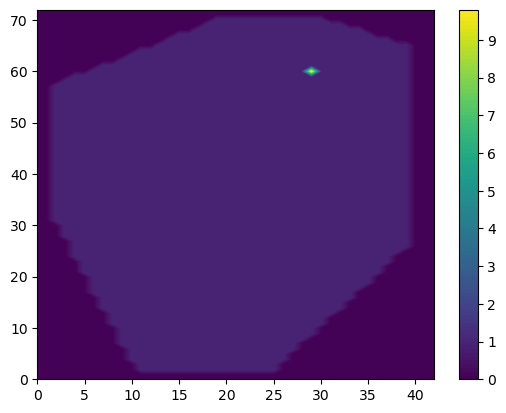

In [7]:
plt.contourf(H_uncert/zl_uncert, levels = 100)
plt.colorbar()

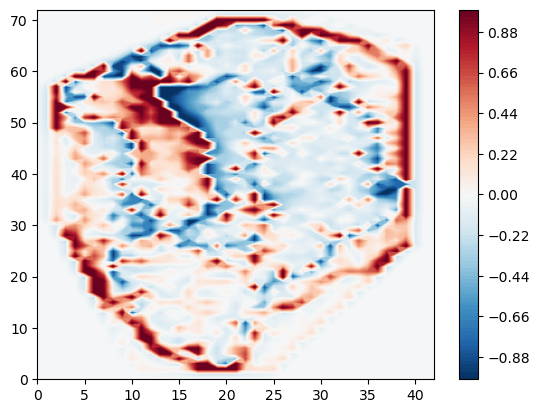

In [8]:
plt.contourf(np.clip(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["zl"].data / zl - 1, -1, 1), levels = 100, cmap = "RdBu_r", vmin = -1, vmax = 1)
plt.colorbar()

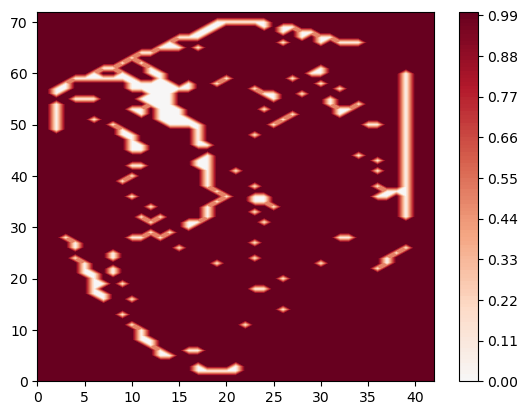

In [9]:
plt.contourf(np.abs(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["zl"].data / zl - 1) <=1, levels = 100, cmap = "RdBu_r", vmin = -1, vmax = 1)
plt.colorbar()

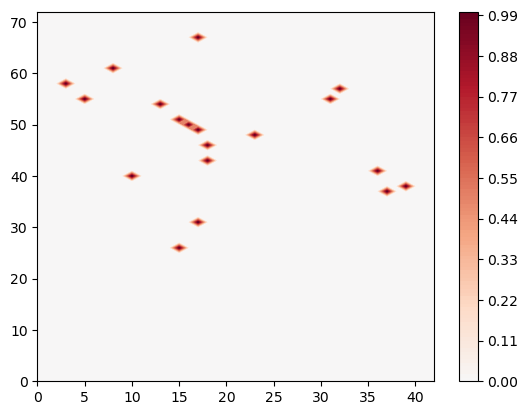

In [10]:
plt.contourf(np.abs(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["zl"].data / zl - 1) >10, levels = 100, cmap = "RdBu_r", vmin = -1, vmax = 1)
plt.colorbar()

/tmp/ipykernel_3222399/2326106034.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.contourf(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["H"].data / H - 1, levels = 100, cmap = "RdBu_r", vmin = -10, vmax = 10)
/tmp/ipykernel_3222399/2326106034.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["H"].data / H - 1, levels = 100, cmap = "RdBu_r", vmin = -10, vmax = 10)


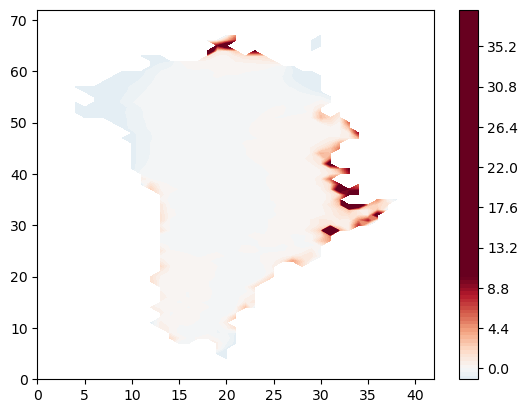

In [11]:
plt.contourf(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["H"].data / H - 1, levels = 100, cmap = "RdBu_r", vmin = -10, vmax = 10)
plt.colorbar()

In [64]:
ds_bm5_40kms = ds_bm5_orig.copy()
ds_bm5_40kms["H"].data = H.copy()
ds_bm5_40kms["zs"].data = zs.copy()
ds_bm5_40kms["zl"].data = zl.copy()
ds_bm5_40kms["zl0"].data = zl.copy()
ds_bm5_40kms["zb"].data = zb.copy()
ds_bm5_40kms["mask"].data = mask.copy()
ds_bm5_40kms["mask_maxextent"].data = mask_maxextent.copy()

ds_bm5_40kms["zl_uncert_unbounded"] = ds_bm5_40kms["zl"].copy()
ds_bm5_40kms["zl_uncert_unbounded"].data = zl_uncert.copy()

ds_bm5_40kms["H_uncert_unbounded"] = ds_bm5_40kms["H"].copy()
ds_bm5_40kms["H_uncert_unbounded"].data = H_uncert.copy()

H_uncert_data = ds_bm5_40kms["H_uncert_unbounded"].data.copy()
zl_uncert_data = ds_bm5_40kms["zl_uncert_unbounded"].data.copy()

# This eta gives minimum_total_uncert model uncertainty at 2000m, maintaining continuity
minimum_model_uncert = 0.0
eta = (1.0 - minimum_total_uncert) * np.max(ds_bm5_orig["H"].data) / 2000.0
H_uncert_model = (1.0 - np.abs(ds_bm5_orig["H"].data/np.max(ds_bm5_orig["H"].data))*eta) * (200.0 + ds_bm5_orig["H"].data) * (ds_bm5_orig["H"].data < 2000.0)
H_uncert_model[ds_bm5_orig["H"].data >= 2000.0] = minimum_model_uncert*ds_bm5_orig["H"].data[ds_bm5_orig["H"].data >= 2000.0]
zl_uncert_model = zl_uncert_data*0.0 + 200.0
# zl_uncert_model[ds_bm5_orig["H"].data >= 2000.0] = np.minimum(zl_uncert_model[ds_bm5_orig["H"].data >= 2000.0], 
#                                                               H_uncert_model[ds_bm5_orig["H"].data >= 2000.0])

H_uncert_total = (H_uncert_data**2 + H_uncert_model**2)**0.5
zl_uncert_total = (zl_uncert_data**2 + zl_uncert_model**2)**0.5

ds_bm5_40kms["H_uncert"] = ds_bm5_40kms["H"].copy()
ds_bm5_40kms["H_uncert"].data = H_uncert_total.copy()

ds_bm5_40kms["zl_uncert"] = ds_bm5_40kms["zl"].copy()
ds_bm5_40kms["zl_uncert"].data = zl_uncert_total.copy()

H_uncert_data_modified = ds_bm5_40kms["H_uncert_unbounded"].data.copy()
zl_uncert_data_modified = ds_bm5_40kms["zl_uncert_unbounded"].data.copy()

H_uncert_data_modified[ds_bm5_orig["H"].data >= 2000.0] = 0.0
zl_uncert_data_modified[ds_bm5_orig["H"].data >= 2000.0] = 0.0

# This eta gives minimum_total_uncert model uncertainty at 2000m, maintaining continuity
minimum_total_uncert = 0.01
eta = (1.0 - minimum_total_uncert) * np.max(ds_bm5_orig["H"].data) / 2000.0
H_uncert_model_modified = (1.0 - np.abs(ds_bm5_orig["H"].data/np.max(ds_bm5_orig["H"].data))*eta) * (100.0 + ds_bm5_orig["H"].data) * (ds_bm5_orig["H"].data < 2000.0)
H_uncert_model_modified[ds_bm5_orig["H"].data >= 2000.0] = minimum_total_uncert*ds_bm5_orig["H"].data[ds_bm5_orig["H"].data >= 2000.0]
# SINCE H_COST IS PRETTY HIGH HERE, KEEPING ZL_UNCERT 100 instead of 200 above
zl_uncert_model_modified = zl_uncert_data*0.0 + 100.0
# zl_uncert_model_modified[ds_bm5_orig["H"].data >= 2000.0] = np.minimum(zl_uncert_model_modified[ds_bm5_orig["H"].data >= 2000.0], 
#                                                                        H_uncert_model_modified[ds_bm5_orig["H"].data >= 2000.0])

H_uncert_total_modified = (H_uncert_data_modified**2 + H_uncert_model_modified**2)**0.5
zl_uncert_total_modified = (zl_uncert_data_modified**2 + zl_uncert_model_modified**2)**0.5

ds_bm5_40kms["H_uncert_modified"] = ds_bm5_40kms["H"].copy()
ds_bm5_40kms["H_uncert_modified"].data = H_uncert_total_modified.copy()

ds_bm5_40kms["zl_uncert_modified"] = ds_bm5_40kms["zl"].copy()
ds_bm5_40kms["zl_uncert_modified"].data = zl_uncert_total_modified.copy()

ds_bm5_40kms["V_dummy2d"] = ds_bm5_40kms["H"].copy()
ds_bm5_40kms["V_dummy2d"].data[:, :] = np.sum(ds_bm5_40kms["H"].data * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data)

ds_bm5_40kms["V_uncert_dummy2d"] = ds_bm5_40kms["H_uncert"].copy()
# ds_bm5_40kms["V_uncert_dummy2d"].data[:, :] = np.sqrt(np.sum(ds_bm5_40kms["H_uncert"].data**2 * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data**2))
ds_bm5_40kms["V_uncert_dummy2d"].data = 0.001 * ds_bm5_40kms["V_dummy2d"]

ds_bm5_40kms["V_uncert_modified_dummy2d"] = ds_bm5_40kms["H_uncert_modified"].copy()
# ds_bm5_40kms["V_uncert_modified_dummy2d"].data[:, :] = np.sqrt(np.sum(ds_bm5_40kms["H_uncert_modified"].data**2 * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data**2))
ds_bm5_40kms["V_uncert_modified_dummy2d"].data = 0.0005 * ds_bm5_40kms["V_dummy2d"]

!rm /scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc
ds_bm5_40kms.to_netcdf("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")

In [65]:
ds_bm5_40kms["V_uncert_dummy2d"].data[0, 0] / np.sqrt(np.sum(ds_bm5_40kms["H_uncert"].data**2 * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data**2))

0.12034094517749647

In [66]:
ds_bm5_40kms["V_uncert_dummy2d"].data[0, 0] / np.sqrt(np.sum(H_uncert_data**2 * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data**2))

0.3600942616032338

In [67]:
ds_bm5_40kms["V_uncert_dummy2d"].data[0, 0] / np.sqrt(np.sum(ds_bm5_40kms["H_uncert_modified"].data**2 * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data**2))

0.15420344660555624

In [68]:
ds_bm5_40kms["V_uncert_dummy2d"].data[0, 0] / np.sqrt(np.sum(H_uncert_data_modified**2 * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data**2))

0.4161557807610714

In [40]:
ds_bm5_40kms["V_dummy2d"].data[0, 0], ds_bm5_40kms["V_uncert_dummy2d"].data[0, 0], ds_bm5_40kms["V_uncert_modified_dummy2d"].data[0, 0]

(2978792189872593.5, 1489396094936.2969, 1489396094936.2969)

In [51]:
V_model = np.sum(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["H"].data * ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data)

ds_bm5_40kms["V_dummy2d"].data[0, 0]/ds_bm5_40kms["V_uncert_dummy2d"].data[0, 0],\
(ds_bm5_40kms["V_dummy2d"].data[0, 0] - V_model)**2/ds_bm5_40kms["V_uncert_dummy2d"].data[0, 0]**2,\
(ds_bm5_40kms["V_dummy2d"].data[0, 0] - V_model)**2/ds_bm5_40kms["V_uncert_modified_dummy2d"].data[0, 0]**2

(999.9999999999999, 14.312591299234105, 57.25036519693642)

In [13]:
field = ds_bm5_40kms["H_uncert_unbounded"].data[ds_bm5_orig["H"].data >= 3000.0]/ds_bm5_orig["H"].data[ds_bm5_orig["H"].data >= 3000.0]

np.sort(field)[::-1]

array([0.1338858 , 0.12308843, 0.0805545 , 0.0764022 , 0.07273109,
       0.06387645, 0.05803049, 0.05694783, 0.04812748, 0.04753634,
       0.04456448, 0.04415621, 0.04369919, 0.04281823, 0.04146697,
       0.0387211 , 0.037195  , 0.03447983, 0.03399477, 0.03347295,
       0.03268873, 0.03231476, 0.03215922, 0.0304297 , 0.03042686,
       0.03023599, 0.0287511 , 0.0280484 , 0.02787694, 0.02763982,
       0.02684939, 0.02594398, 0.02468914, 0.02408919, 0.02394766,
       0.02386402, 0.02330288, 0.0232098 , 0.02126414, 0.0204964 ,
       0.01917332, 0.017743  , 0.01652252, 0.01619152, 0.01583776,
       0.01500984, 0.01494549, 0.01441889, 0.01428079, 0.01418774,
       0.0141818 , 0.01351671, 0.01304792, 0.01282023, 0.0127532 ,
       0.01195343, 0.01164182, 0.01117449, 0.01097318, 0.01081771,
       0.01081712, 0.0102832 , 0.01027441, 0.0099836 , 0.00984121,
       0.00982712])

In [14]:
### OLD METHOD

# ds_bm5_40kms = ds_bm5_orig.copy()
# ds_bm5_40kms["H"].data = H.copy()
# ds_bm5_40kms["zs"].data = zs.copy()
# ds_bm5_40kms["zl"].data = zl.copy()
# ds_bm5_40kms["zl0"].data = zl.copy()
# ds_bm5_40kms["zb"].data = zb.copy()
# ds_bm5_40kms["mask"].data = mask.copy()
# ds_bm5_40kms["mask_maxextent"].data = mask_maxextent.copy()

# ds_bm5_40kms["zl_uncert_unbounded"] = ds_bm5_40kms["zl"].copy()
# ds_bm5_40kms["zl_uncert_unbounded"].data = zl_uncert.copy()

# ds_bm5_40kms["H_uncert_unbounded"] = ds_bm5_40kms["H"].copy()
# ds_bm5_40kms["H_uncert_unbounded"].data = H_uncert.copy()

# ratio = H/H_uncert
# H_uncert_bounded = H_uncert.copy()
# H_uncert_bounded[ratio >= 10.0] = 0.1*H[ratio >= 10.0]

# # Model representation error increases with decreasing H
# # scale_uncert_factor_1 does not exist here, it does in the age data uncert
# scale_uncert_factor_2 = 5.0 - np.abs(ds_bm5_orig["H"].data/np.max(ds_bm5_orig["H"].data))*4.0    # Scale uncert to account for model representation error

# ds_bm5_40kms["H_uncert"] = ds_bm5_40kms["H"].copy()
# ds_bm5_40kms["H_uncert"].data = H_uncert_bounded.copy()*scale_uncert_factor_2

# ## OLD
# # ratio = H/zl_uncert
# # zl_uncert_bounded = zl_uncert.copy()
# # zl_uncert_bounded[ratio >= 10.0] = 0.1*H[ratio >=10.0]
# # ds_bm5_40kms["zl_uncert"] = ds_bm5_40kms["zl"].copy()
# # ds_bm5_40kms["zl_uncert"].data = zl_uncert_bounded.copy()

# # The idea is to be at least as uncertain as H
# ds_bm5_40kms["zl_uncert"] = ds_bm5_40kms["zl"].copy()
# ds_bm5_40kms["zl_uncert"].data = np.maximum(zl_uncert, H_uncert)

# ds_bm5_40kms["zs_uncert"] = ds_bm5_40kms["zs"].copy()
# ds_bm5_40kms["zs_uncert"].data = zl_uncert.copy()*0.0 + H_offset

# !rm /scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc
# ds_bm5_40kms.to_netcdf("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")

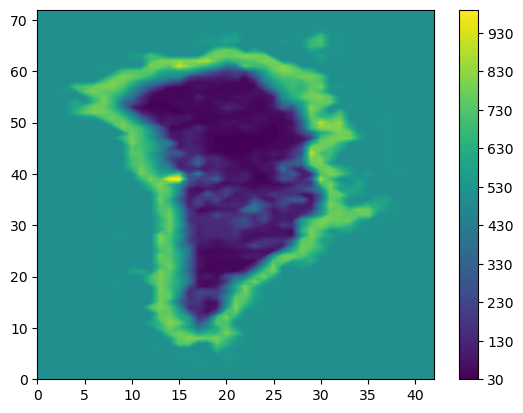

In [15]:
plt.contourf(H_uncert_total, levels = 100)
plt.colorbar()

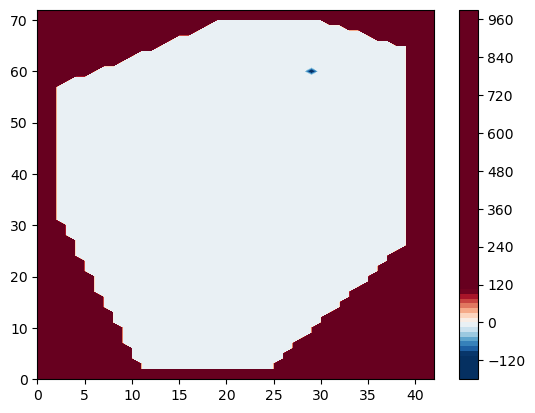

In [16]:
plt.contourf(zl_uncert-H_uncert, vmin = -100, vmax = 100, cmap = "RdBu_r", levels = 100)
plt.colorbar()

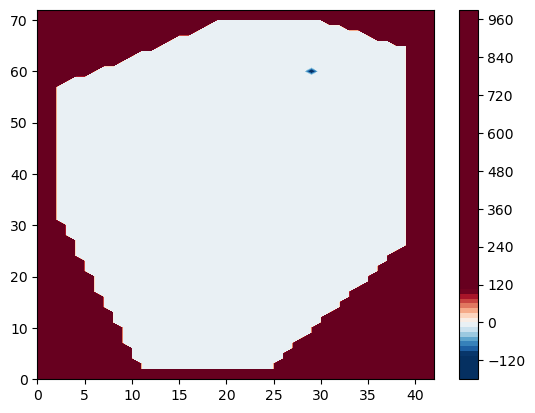

In [17]:
plt.contourf(fields_ds["zl_uncert"]-fields_ds["H_uncert"], vmin = -100, vmax = 100, cmap = "RdBu_r", levels = 100)
plt.colorbar()

In [18]:
fields_ds["zl_uncert"][35, 20], fields_ds["H_uncert"][35, 20]

(70.7049359375001, 70.7049359375001)

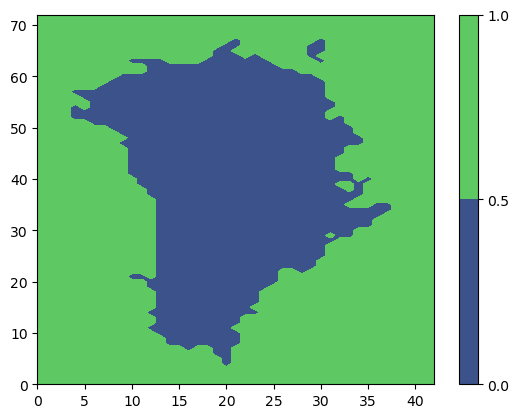

In [19]:
plt.contourf(ds_bm5_40kms["zl_uncert"].data>ds_bm5_40kms["H"].data)
plt.colorbar()

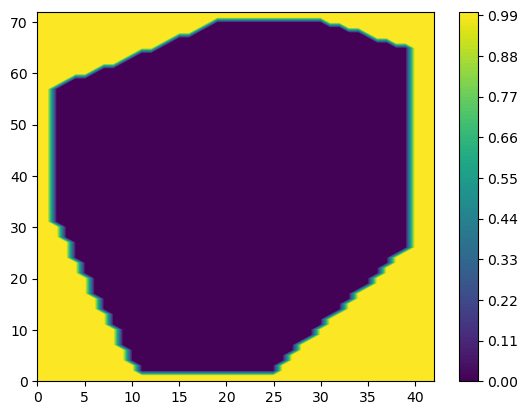

In [20]:
plt.contourf(ds_bm5_40kms["H_uncert"].data == 10.0, levels = 100)
plt.colorbar()

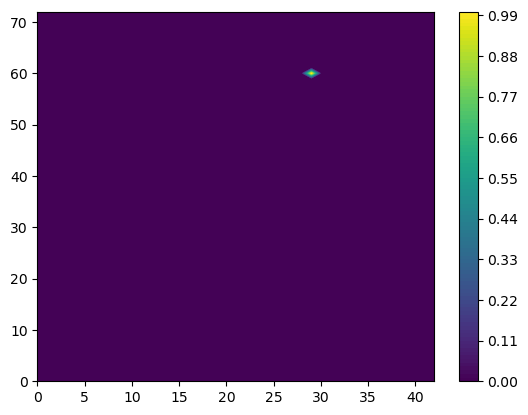

In [21]:
plt.contourf(floating, levels = 100)
plt.colorbar()

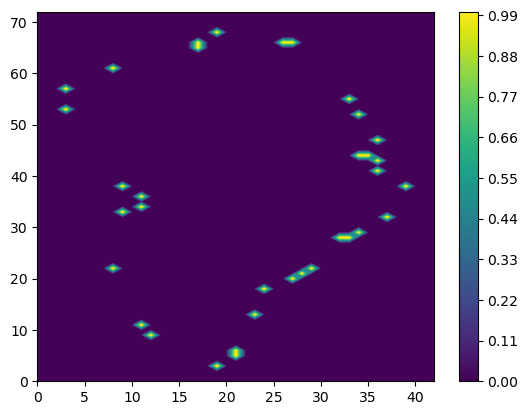

In [22]:
plt.contourf(above_sea, levels = 100)
plt.colorbar()

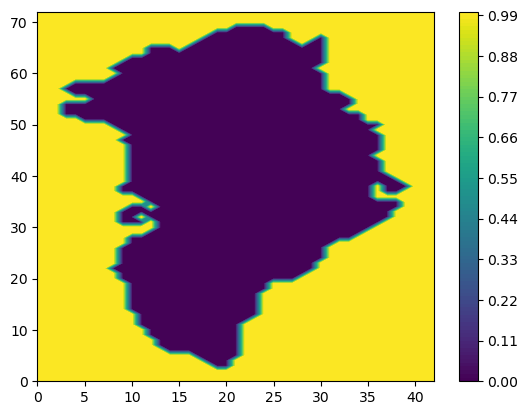

In [23]:
plt.contourf(below_sea, levels = 100)
plt.colorbar()

In [24]:
mask = (ds_bm5_40kms["H"].data == 0.0) & (ds_bm5_40kms["H_uncert"].data == 0.0)
np.sum(mask)

0

In [25]:
mask = (ds_bm5_40kms["H"].data < 0.0) & (ds_bm5_40kms["H_uncert"].data < 0.0)
np.sum(mask)

0

In [26]:
mask = (ds_bm5_40kms["H"].data > 0.0) & (ds_bm5_40kms["H_uncert"].data > 0.0)
np.sum(mask), np.nanmax(np.abs(ds_bm5_40kms["H"].data) / ds_bm5_40kms["H_uncert"].data * mask), np.nanmin(np.abs(ds_bm5_40kms["H"].data) / ds_bm5_40kms["H_uncert"].data * mask)

(1119, 101.75922606602064, 0.0)

In [27]:
mask = (ds_bm5_40kms["H"].data <= 0.0) & (ds_bm5_40kms["H_uncert"].data > 0.0)
np.sum(mask)

2020

In [28]:
mask = (ds_bm5_40kms["H"].data > 0.0) & (ds_bm5_40kms["H_uncert"].data <= 0.0)
np.sum(mask)

0

In [29]:
mask = (ds_bm5_40kms["H"].data < 0.0) & (ds_bm5_40kms["H_uncert"].data > 0.0)
np.sum(mask)

0

In [30]:
mask = (ds_bm5_40kms["H"].data > 0.0) & (ds_bm5_40kms["H_uncert"].data < 0.0)
np.sum(mask)

0

In [31]:
np.sum(ds_bm5_40kms["H_uncert"].data != ds_bm5_40kms["H_uncert_unbounded"].data)

662

In [32]:
np.sum(ds_bm5_40kms["zl_uncert"].data != ds_bm5_40kms["zl_uncert_unbounded"].data)

2682

In [33]:
np.sum(ds_bm5_40kms["zl_uncert"].data != zl_uncert)

2682

In [34]:
np.sum(ds_bm5_40kms["zl_uncert"].data != ds_bm5_40kms["H_uncert"].data)

2682